# Example showing how mix python and madagascar processing #

This notebook:
    * creates data in python
    * writes in madagascar .rsf file
    * bandlimited with sfbandpass
    * plots with sfwiggle
    * reads bandlimits data back into notebook
    * plots using matplotlib.pyplot.imshow
    
The notebook can be run in Python 3 (using git updates from m8r.py and doc.py on July 27, 2018)
and Madagascar built with Python 2.  m8r.py has been tested for both Python 2 and Python 3.

In [1]:
# basic imports.  
import os
import numpy as np
import matplotlib
# use the nbagg backend to render plot.  It provides basic zoom and pan capability.
matplotlib.use('nbagg') # previously I used this magic command: %matplotlib inline
# I think import matplotlib.pyplot must be after matplotlib.use('nbagg') 
import matplotlib.pyplot as plt

#m8r library provides read and write of madagascar data
import m8r 

In [2]:
#create a numpy ndarray (a 2D array) of all floating point zeros
a = np.zeros((60,50),dtype='float32') 
# set point at 25,25 to 1.0
a[25,25]=1.0

#open and output file.  
file1=m8r.Output('file1.rsf')
# Set n1, o1, and d1 in the output file.  This is the fastest index.
# The numpy ndarray is ahape (n2,n1), fastest index is last.
file1.put('n1',50)
file1.put('o1',0)
file1.put('d1',.004)
# Set n2, o2, and d2 in the output file.
file1.put('n2',60)
file1.put('o2',1)
file1.put('d2',1)

# Write the data to disc and close the file
file1.write(a)
file1.close()

In [3]:
# print m8r.Output documentation.  Needs to be writen.
m8r.Output?

In [4]:
# Apply bandpass filter using madagascar.  My notebook is python3, but my madagascar is python 2.  
# It works!
os.system('sfbandpass <file1.rsf fhi=20 > file2.rsf') 

0

In [5]:
# plot the bandlimmed dat using madagascar sfwiggle
os.system('sfwiggle <file2.rsf pclip=99.7 |sfpen')

0

In [6]:
# print shape of the a array (created with a = np.zeros((60,50),dtype='float32') )
a.shape

(60, 50)

<IPython.core.display.Javascript object>


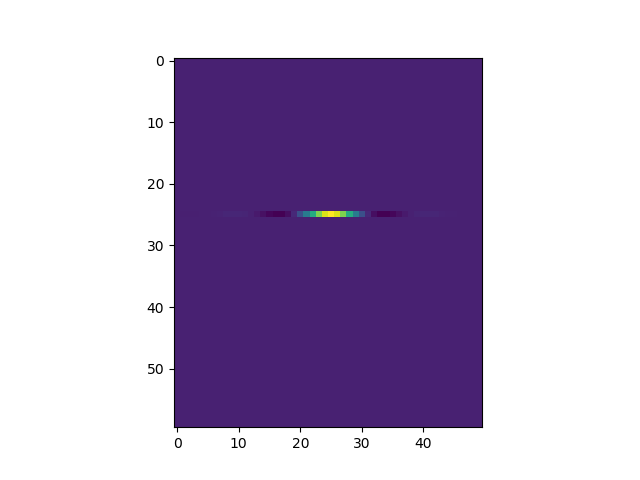

In [7]:
#read 'file2.rsf' into numpy ndarray and plot using matplotlib.pyplot.imshow
file2 = m8r.Input('file2.rsf') 
b=file2.read()
plt.imshow(b)
plt.show()